# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:

import statsmodels as sm

In [6]:

import matplotlib.pyplot as plt
import statsmodels as sm
import pylab as pl
import numpy as np
%matplotlib inline


### Step 2: Read in your data set 

In [7]:
#Read in data from source 
df_raw = pd.read_csv("collegeadmissions.csv")
df_raw.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [8]:
df_raw.columns = ["admit", "gre", "gpa", "prestige"]
df_raw.columns
  # array([admit, gre, gpa, prestige], dtype=object)

Index(['admit', 'gre', 'gpa', 'prestige'], dtype='object')

## Questions
#### Question 1. How many observations are in our dataset? 


In [9]:
df_raw.count()

admit       400
gre         400
gpa         400
prestige    400
dtype: int64

In [10]:
df_raw.shape

(400, 4)

Answer: There are 400 observations

#### Question 2. Create a summary table

In [11]:
#function 

In [12]:
df_raw['admit'].sum()

127

In [13]:
df_raw['admit'].mean()

0.3175

In [14]:
df_raw['gpa'].sum() 

1355.9600000000007

In [16]:
df_raw['gre'].std() 

115.51653637223819

In [17]:
df_raw['gpa'].std() 

0.38056677163038394

In [18]:
df_raw.describe() #summary table

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


#### Question 3. Why would GRE have a larger STD than GPA?

In [19]:
df_raw.std()

admit         0.466087
gre         115.516536
gpa           0.380567
prestige      0.944460
dtype: float64

Answer: The scaling is different which makes the GRE have a larger STD than GPA. One is mesured on a 1.0 to 4.0 scale and the other is measured from 200 to 800 scale.    



#### Question 4. Drop data points with missing data


In [20]:
df_raw.dropna().isnull().apply(sum, axis = 0)

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

In [21]:
df_raw.dropna(how = "any", inplace = True) #nothing happened

In [290]:
df_raw.shape

(400, 4)

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [292]:
df_raw.dropna().isnull().apply(sum, axis = 0)

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

In [293]:
df_raw.dropna(how = 'any', inplace = True)

Answer: This command test if any entries are Null (isnull). True = a row contains missing values. 

#### Question 6. Create box plots for GRE and GPA

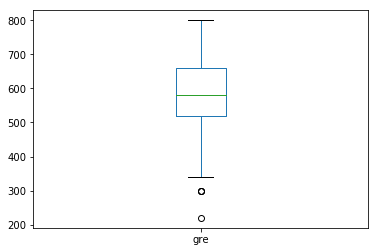

In [294]:
df_raw.gre.plot(kind='box')#boxplot 1

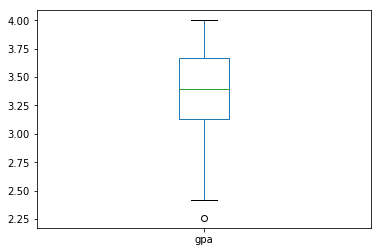

In [295]:
df_raw.gpa.plot(kind='box')#boxplot 2 

#### Question 7. What do this plots show?

Answer: In the GRE plot it shows there were some scores that were below 300, 75% of them had scores 660 or higher with a max of 800, and 50% of them scored 550 or above with a max of 800. There are some outliers that can effect the mean.

Answer: In the GPA plot it shows that 50% of the test takers had a GPA of 3.395 or above. And 75% of the test takers had a GPA of 3.67 or above. There are also an outlier that has a GPA of 2.26 which makes it less than normal. Based on the box whiskers plot it doesn't look like normal distribution for GPA. Also, the data may not be reliable because the test takers may not have been  measured on the same type of course work/scale. Meanawhile, those who took the GRE were tested on the same material. 

#### Question 8. Describe each distribution 


In [298]:
#plot the distribution of each variable

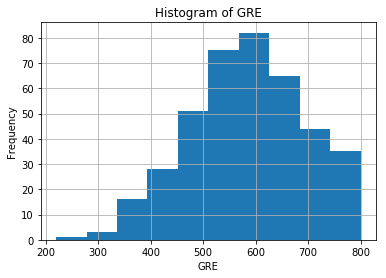

In [22]:
df_raw['gre'].hist()
pl.title('Histogram of GRE')
pl.xlabel('GRE')
pl.ylabel('Frequency')
pl.show()

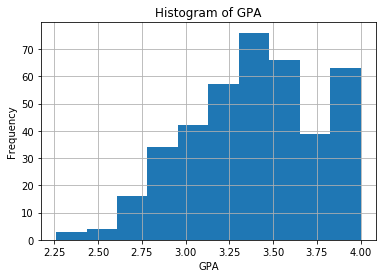

In [23]:
df_raw['gpa'].hist() ##the entry I emailed you 
pl.title('Histogram of GPA')
pl.xlabel('GPA')
pl.ylabel('Frequency')
pl.show()

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: We can test the model by using Shapiro-Wilk tests. It doesn't have a normal distribution and it looks like it's right skewed based on the graph below so it doesn't meet the requirement because the main point is not in the middle instead it equals to 2.5.


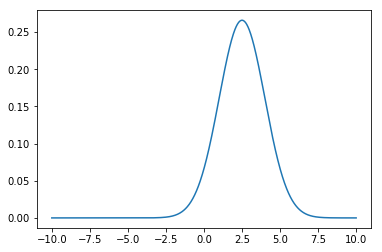

In [34]:
import pylab
from scipy.stats import norm
x = np.linspace(-10,10,1000)
y = norm.pdf(x, loc=2.5, scale=1.5)
pylab.plot(x,y)
pylab.show()

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes it needs correction. The GPA is not distributed evenly compared to GRE and how many were admitted because the test takers might have been scaled differently based on what school they went too. Some may have had a tougher/ easier curriculum. We would need to normalize the data, standardize data,Imputation of missing values and we can use sklearn.preprocessing to do this.

#### Question 11. Which of our variables are potentially colinear? 

In [271]:
# create a correlation matrix for the data
df_raw.corr()

,admit,gre,gpa,rank
admit,1.000000,0.184434,0.178212,-0.242513
gre,0.184434,1.000000,0.384266,-0.123447
gpa,0.178212,0.384266,1.000000,-0.057461
rank,-0.242513,-0.123447,-0.057461,1.000000


#### Question 12. What did you find?

Answer: I found anything corr. to itself is '1'. There is also a negative corr. between rank & admit, rank & gre, rank & gpa. GRE and GPA, admit and GRE, and admit and GPA have weak positive corr.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer:
Question: Is there a statistically significant relationship between grad school admissions rates and prestige of undergraduate schools ?

-Collect accurate data from grad school admissions rates and prestige from undergraduate schools.

-Collect effective and enough data, collect data from former, current, and those applying to grad. school. Also the undergraduate schools they attended. The graduate program they applyed for, their major in undergrad. 

-So decide what variables will be used

-Analyze data by using graphs(bar graph, scatter graph, line, etc.) and scaling the variables correctly

-Add dummy variables 

-Clean up data

-Run regression model

-Interpret the results


#### Question 14. What is your hypothesis? 

Answer: 
I hypothesis that work experience can in influence admissions into grad school. Therefore, I fail to reject the null hypothesis.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data